In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#READING FILE
dec_city   =   pd.read_csv('../Dataset/Decadal_air_data_cities.csv')
dec_st     =   pd.read_csv('../Dataset/Decadal_Air_data_states.csv')

In [3]:
#CITY
df_city_2020 = dec_city[dec_city['year'] == 2020].loc[:,['City','SO2','NO2','PM2.5']]         #FOR 2020
df_city_2019 = dec_city[dec_city['year'] == 2019].loc[:,['City','SO2','NO2','PM2.5']]         #FOR 2019
#STATE
df_state_2020 = dec_st[dec_st['year'] == 2020].loc[:,['State','SO2','NO2','PM2.5']]         #FOR 2020
df_state_2019 = dec_st[dec_st['year'] == 2019].loc[:,['State','SO2','NO2','PM2.5']]         #FOR 2019


In [4]:
df_city_2020.shape

(21, 4)

NORMALIZING THE DATA

In [5]:
scaler = MinMaxScaler()
df_city_2020[['SO2','NO2','PM2.5']] = scaler.fit_transform(df_city_2020[['SO2','NO2','PM2.5']])     #NORMALIZATION
df_city_2019[['SO2','NO2','PM2.5']] = scaler.fit_transform(df_city_2019[['SO2','NO2','PM2.5']])     #NORMALIZATION

df_state_2020[['SO2','NO2','PM2.5']] = scaler.fit_transform(df_state_2020[['SO2','NO2','PM2.5']])     #NORMALIZATION
df_state_2019[['SO2','NO2','PM2.5']] = scaler.fit_transform(df_state_2019[['SO2','NO2','PM2.5']])     #NORMALIZATION

### OPTIMAL K

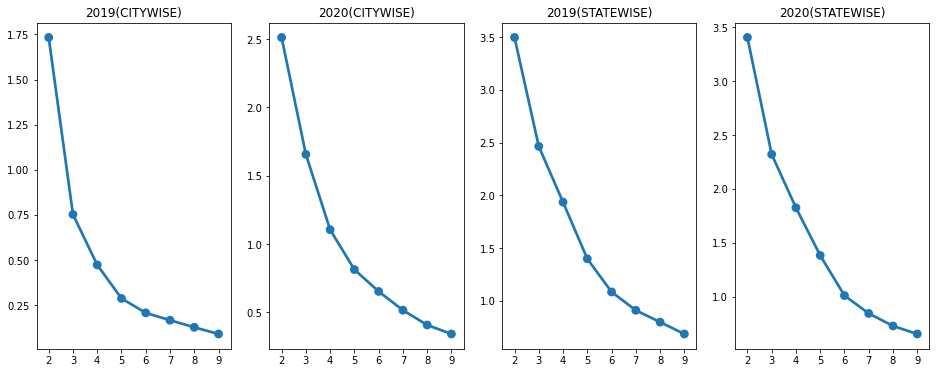

In [6]:
# np.random.seed(10) 
inertia_2020 = []               #SSE(SUM OF SQUARED ERROR) 
inertia_2019 = []

inertia_st_2020 = []               #SSE(SUM OF SQUARED ERROR) 
inertia_st_2019 = []

for i in range(2, 10):
  # Instantiate the model
    model_2020 = KMeans(n_clusters=i)
    model_2019 = KMeans(n_clusters=i)
    
    model_st_2020 = KMeans(n_clusters=i)
    model_st_2019 = KMeans(n_clusters=i)
    
    
  # Fit The Model
    model_2020.fit(df_city_2020[['SO2','NO2','PM2.5']])
    model_2019.fit(df_city_2019[['SO2','NO2','PM2.5']])
    
    model_st_2020.fit(df_state_2020[['SO2','NO2','PM2.5']])
    model_st_2019.fit(df_state_2019[['SO2','NO2','PM2.5']])
    
  # Extract the error of the model
    inertia_2020.append(model_2020.inertia_)
    inertia_2019.append(model_2019.inertia_)
    
    inertia_st_2020.append(model_st_2020.inertia_)
    inertia_st_2019.append(model_st_2019.inertia_)
    
# Visualize the model
fig, b = plt.subplots(1, 4, figsize=(16,6))
sns.pointplot(x=list(range(2, 10)), y=inertia_2020,ax=b[1])
b[1].set_title('2020(CITYWISE)')
sns.pointplot(x=list(range(2, 10)), y=inertia_2019,ax=b[0])
b[0].set_title('2019(CITYWISE)')

sns.pointplot(x=list(range(2, 10)), y=inertia_st_2020,ax=b[3])
b[3].set_title('2020(STATEWISE)')
sns.pointplot(x=list(range(2, 10)), y=inertia_st_2019,ax=b[2])
b[2].set_title('2019(STATEWISE)')

plt.show()

### K=5 CAN BE CONSIDERED AS OPTIMAL

In [7]:
# np.random.seed(42)# Instantiate the model

# Fit the model
model_2020 = KMeans(n_clusters=5)
model_2019 = KMeans(n_clusters=5)

model_st_2020 = KMeans(n_clusters=5)
model_st_2019 = KMeans(n_clusters=5)

# FIT AND PREDICT THE DATA  and adding as a column to respective DATAFRAMES
df_city_2020['cluster'] = model_2020.fit_predict(df_city_2020[['SO2','NO2','PM2.5']])
df_city_2019['cluster'] = model_2019.fit_predict(df_city_2019[['SO2','NO2','PM2.5']])

df_state_2020['cluster'] = model_st_2020.fit_predict(df_state_2020[['SO2','NO2','PM2.5']])
df_state_2019['cluster'] = model_st_2019.fit_predict(df_state_2019[['SO2','NO2','PM2.5']])


### CITY PLOTS

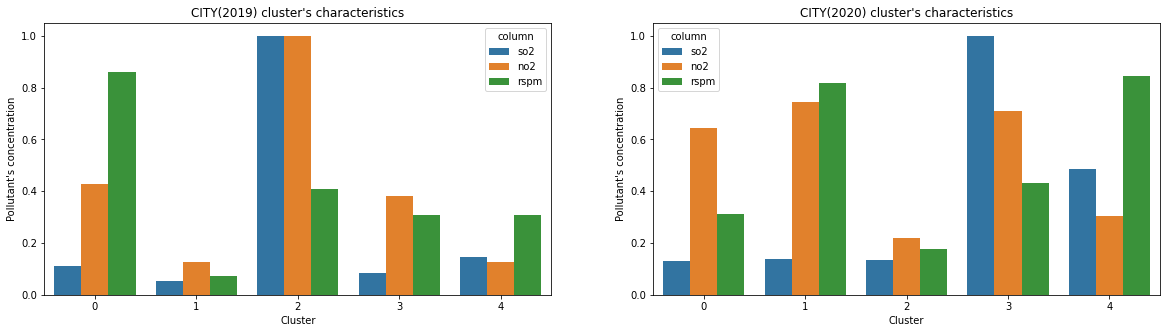

In [8]:
visualize_2020 = pd.DataFrame(model_2020.cluster_centers_)
visualize_2019 = pd.DataFrame(model_2019.cluster_centers_) 

visualize_2020 = visualize_2020.T
visualize_2019 = visualize_2019.T

visualize_2020['column'] = ['so2', 'no2', 'rspm']
visualize_2019['column'] = ['so2', 'no2', 'rspm']

# visualize['column'] = ['rspm']
visualize_2020 = visualize_2020.melt(id_vars=['column'], var_name='cluster')
visualize_2019 = visualize_2019.melt(id_vars=['column'], var_name='cluster')

visualize_2020['cluster'] = visualize_2020.cluster.astype('category')# Visualize the result
visualize_2019['cluster'] = visualize_2019.cluster.astype('category')# Visualize the result

fig , b = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(x='cluster', y='value', hue='column', data=visualize_2020,ax=b[1])
sns.barplot(x='cluster', y='value', hue='column', data=visualize_2019,ax=b[0])
                       
b[0].set_xlabel("Cluster")
b[0].set_ylabel('Pollutant\'s concentration')
b[0].set_title('CITY(2019) cluster\'s characteristics')

b[1].set_xlabel("Cluster")
b[1].set_ylabel('Pollutant\'s concentration')
b[1].set_title('CITY(2020) cluster\'s characteristics')


fig.savefig('../Images/clustering-city.png')
plt.show()

### STATE PLOTS

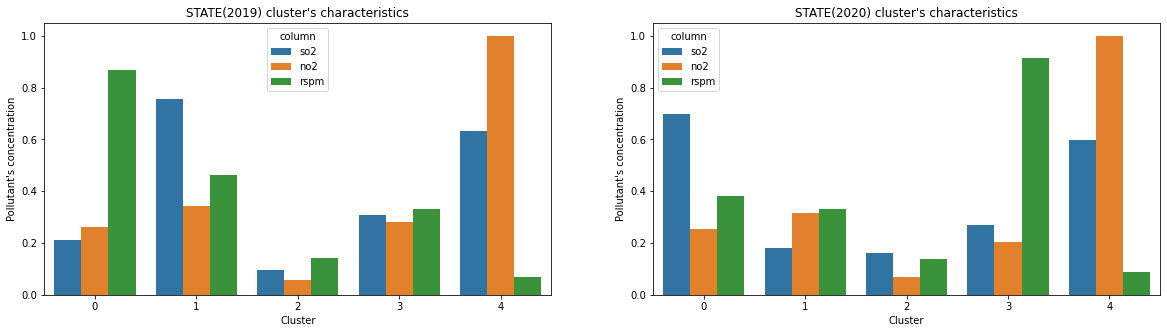

In [9]:
visualize_st_2020 = pd.DataFrame(model_st_2020.cluster_centers_)
visualize_st_2019 = pd.DataFrame(model_st_2019.cluster_centers_) 

visualize_st_2020 = visualize_st_2020.T
visualize_st_2019 = visualize_st_2019.T

visualize_st_2020['column'] = ['so2', 'no2', 'rspm']
visualize_st_2019['column'] = ['so2', 'no2', 'rspm']

# visualize['column'] = ['rspm']
visualize_st_2020 = visualize_st_2020.melt(id_vars=['column'], var_name='cluster')
visualize_st_2019 = visualize_st_2019.melt(id_vars=['column'], var_name='cluster')

visualize_st_2020['cluster'] = visualize_st_2020.cluster.astype('category')# Visualize the result
visualize_st_2019['cluster'] = visualize_st_2019.cluster.astype('category')# Visualize the result

fig , b = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(x='cluster', y='value', hue='column', data=visualize_st_2020,ax=b[1])
sns.barplot(x='cluster', y='value', hue='column', data=visualize_st_2019,ax=b[0])
                       
b[0].set_xlabel("Cluster")
b[0].set_ylabel('Pollutant\'s concentration')
b[0].set_title('STATE(2019) cluster\'s characteristics')

b[1].set_xlabel("Cluster")
b[1].set_ylabel('Pollutant\'s concentration')
b[1].set_title('STATE(2020) cluster\'s characteristics')


fig.savefig('../Images/clustering-state.png')
plt.show()

### CITY

In [10]:
with open('../Dataset/Generated/cluster/ClusterMembers_city_2020.txt', 'w') as f:    
    for i in range(5):
        f.write("Cluster: " + str(i) + '\n')
        f.write("The Members: " + ' | '.join(list(df_city_2020[df_city_2020['cluster'] == i]['City'].values)) + '\n')
        f.write("Total Members: " + str(len(list(df_city_2020[df_city_2020['cluster'] == i]['City'].values))) + '\n')
        f.write('\n')

In [11]:
with open('../Dataset/Generated/cluster/ClusterMembers_city_2019.txt', 'w') as f:    
    for i in range(5):
        f.write("Cluster: " + str(i) + '\n')
        f.write("The Members: " + ' | '.join(list(df_city_2019[df_city_2019['cluster'] == i]['City'].values)) + '\n')
        f.write("Total Members: " + str(len(list(df_city_2019[df_city_2019['cluster'] == i]['City'].values))) + '\n')
        f.write('\n')

### STATE

In [12]:
with open('../Dataset/Generated/cluster/ClusterMembers_state_2020.txt', 'w') as f:    
    for i in range(5):
        f.write("Cluster: " + str(i) + '\n')
        f.write("The Members: " + ' | '.join(list(df_state_2020[df_state_2020['cluster'] == i]['State'].values)) + '\n')
        f.write("Total Members: " + str(len(list(df_state_2020[df_state_2020['cluster'] == i]['State'].values))) + '\n')
        f.write('\n')

In [13]:
with open('../Dataset/Generated/cluster/ClusterMembers_state_2019.txt', 'w') as f:    
    for i in range(5):
        f.write("Cluster: " + str(i) + '\n')
        f.write("The Members: " + ' | '.join(list(df_state_2019[df_state_2019['cluster'] == i]['State'].values)) + '\n')
        f.write("Total Members: " + str(len(list(df_state_2019[df_state_2019['cluster'] == i]['State'].values))) + '\n')
        f.write('\n')